In [5]:
import librosa, librosa.display
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline

In [6]:
signal, sr = librosa.load(librosa.util.example('brahms'))

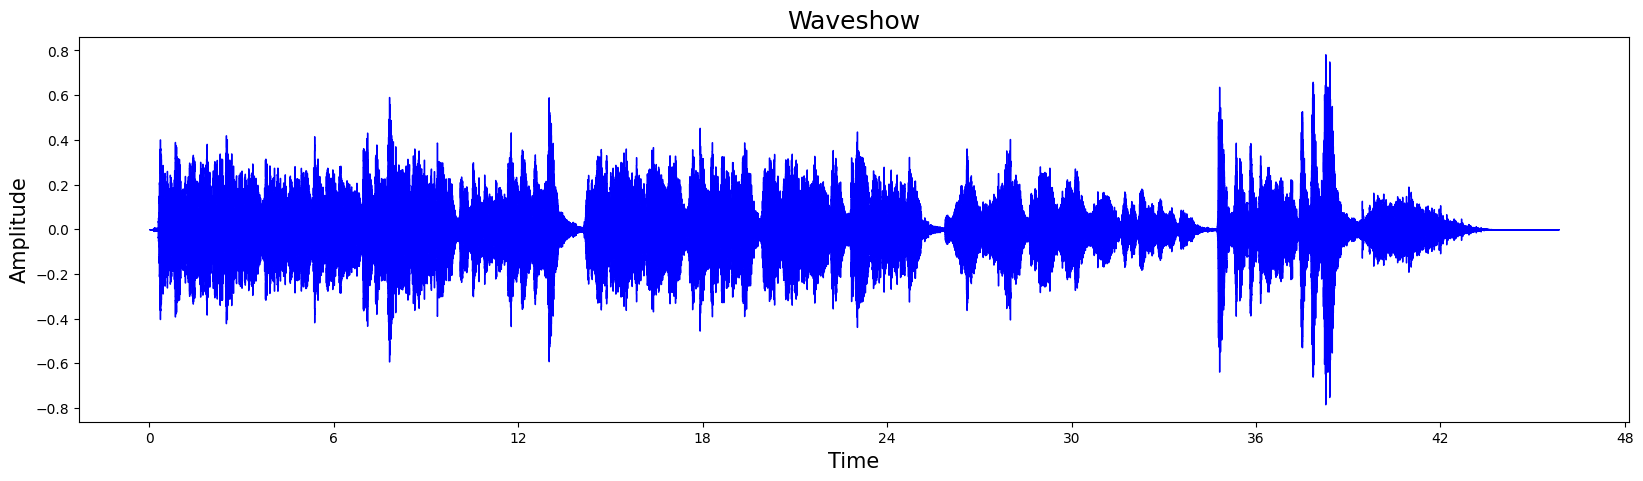

In [10]:
plt.figure(figsize=(20, 5))
librosa.display.waveshow(signal, sr=sr, color="blue")
plt.title('Waveshow', fontdict=dict(size=18))
plt.xlabel('Time', fontdict=dict(size=15))
plt.ylabel('Amplitude', fontdict=dict(size=15))
plt.show()

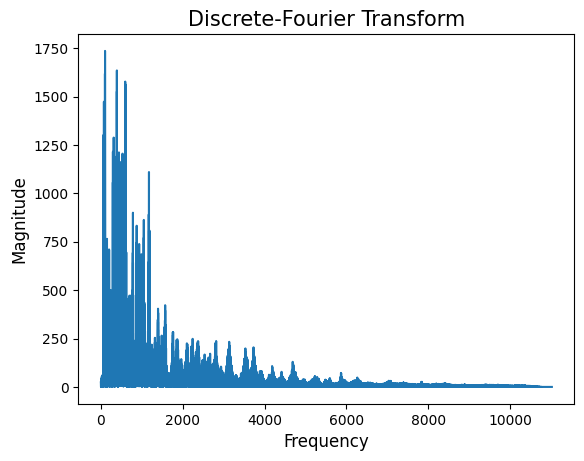

In [11]:
# Creating a Discrete-Fourier Transform with our FFT algorithm
fast_fourier_transf = np.fft.fft(signal)# Magnitudes indicate the contribution of each frequency
magnitude = np.abs(fast_fourier_transf)# mapping the magnitude to the relative frequency bins
frequency = np.linspace(0, sr, len(magnitude))# We only need the first half of the magnitude and frequency
left_mag = magnitude[:int(len(magnitude)/2)]
left_freq = frequency[:int(len(frequency)/2)] 
plt.plot(left_freq, left_mag)
plt.title('Discrete-Fourier Transform', fontdict=dict(size=15))
plt.xlabel('Frequency', fontdict=dict(size=12))
plt.ylabel('Magnitude', fontdict=dict(size=12))
plt.show()

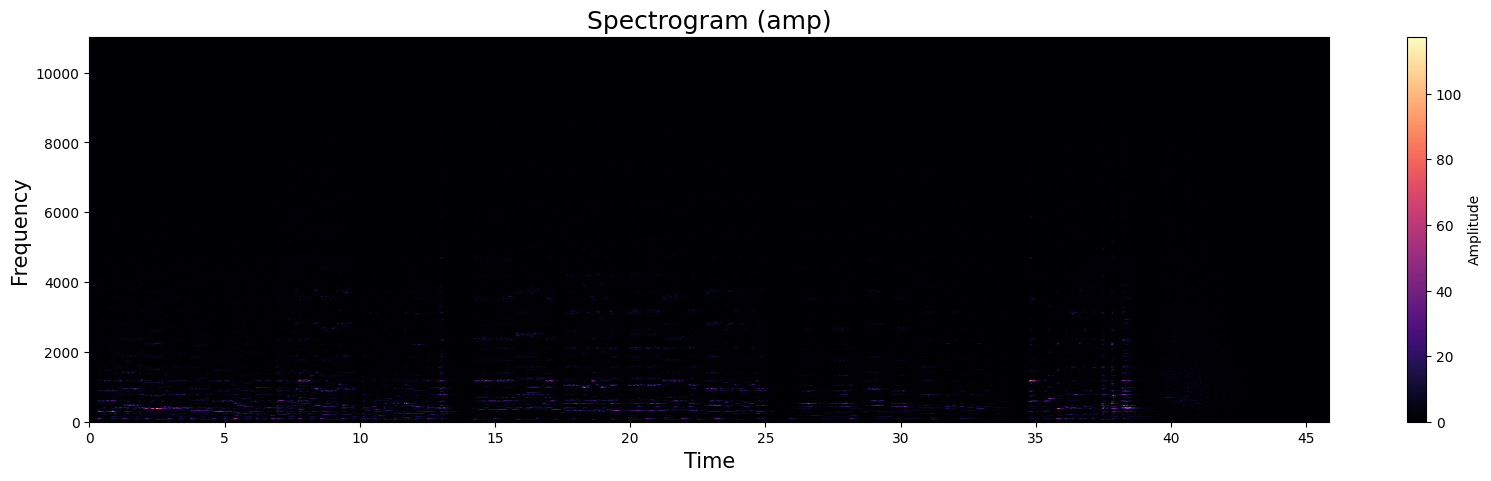

In [12]:
# this is the number of samples in a window per fft
n_fft = 2048# The amount of samples we are shifting after each fft
hop_length = 512# Short-time Fourier Transformation on our audio data
audio_stft = librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)# gathering the absolute values for all values in our audio_stft
spectrogram = np.abs(audio_stft)# Plotting the short-time Fourier Transformation
plt.figure(figsize=(20, 5))# Using librosa.display.specshow() to create our spectrogram
librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='hz', hop_length=hop_length)
plt.colorbar(label='Amplitude')
plt.title('Spectrogram (amp)', fontdict=dict(size=18))
plt.xlabel('Time', fontdict=dict(size=15))
plt.ylabel('Frequency', fontdict=dict(size=15))
plt.show()

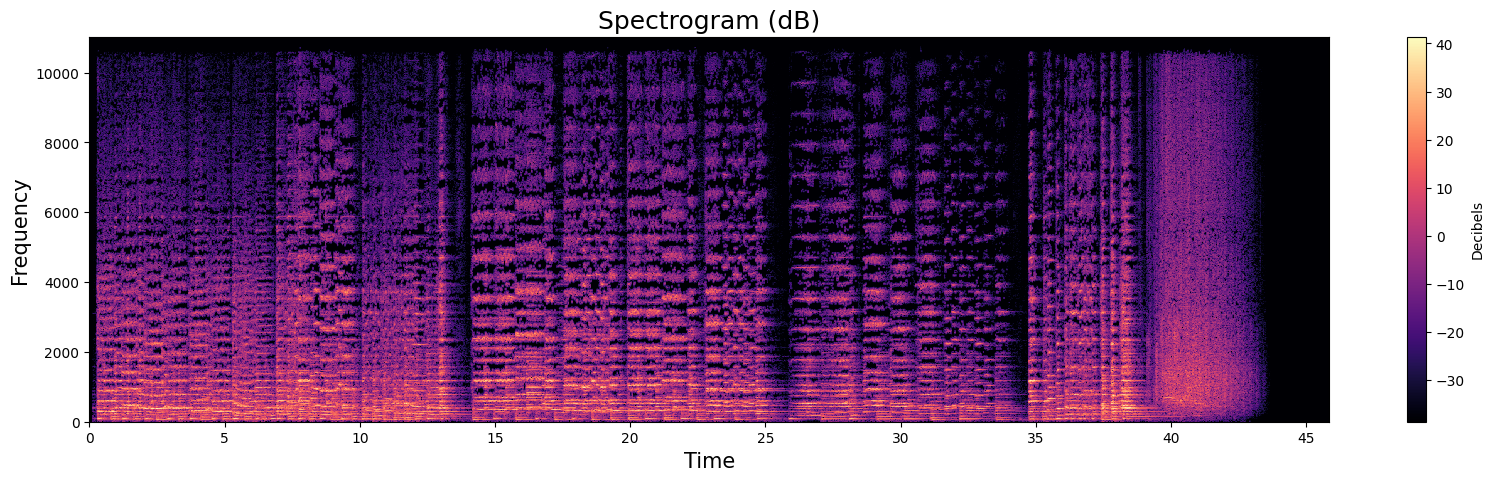

In [13]:
# Short-time Fourier Transformation on our audio data
audio_stft = librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)# gathering the absolute values for all values in our audio_stft 
spectrogram = np.abs(audio_stft)# Converting the amplitude to decibels
log_spectro = librosa.amplitude_to_db(spectrogram)# Plotting the short-time Fourier Transformation
plt.figure(figsize=(20, 5))# Using librosa.display.specshow() to create our spectrogram
librosa.display.specshow(log_spectro, sr=sr, x_axis='time', y_axis='hz', hop_length=hop_length, cmap='magma')
plt.colorbar(label='Decibels')
plt.title('Spectrogram (dB)', fontdict=dict(size=18))
plt.xlabel('Time', fontdict=dict(size=15))
plt.ylabel('Frequency', fontdict=dict(size=15))
plt.show()

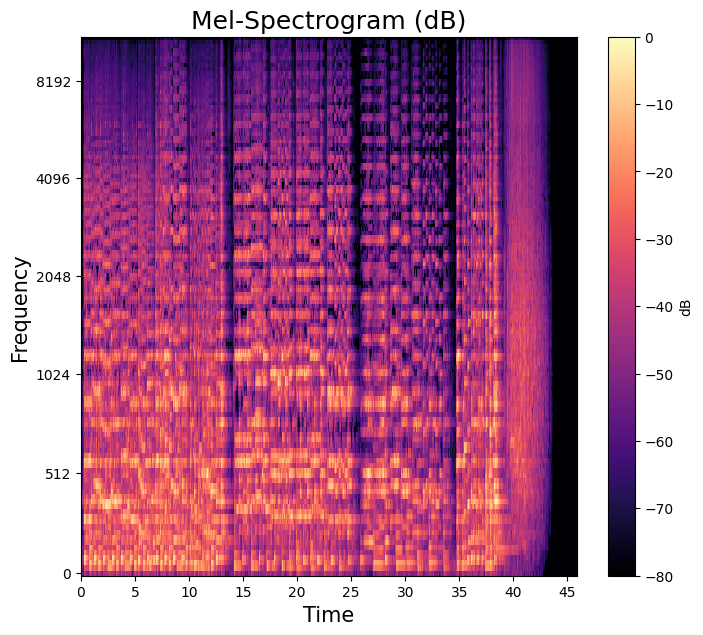

In [14]:
mel_signal = librosa.feature.melspectrogram(y=signal, sr=sr, hop_length=hop_length, 
 n_fft=n_fft)
spectrogram = np.abs(mel_signal)
power_to_db = librosa.power_to_db(spectrogram, ref=np.max)
plt.figure(figsize=(8, 7))
librosa.display.specshow(power_to_db, sr=sr, x_axis='time', y_axis='mel', cmap='magma', hop_length=hop_length)
plt.colorbar(label='dB')
plt.title('Mel-Spectrogram (dB)', fontdict=dict(size=18))
plt.xlabel('Time', fontdict=dict(size=15))
plt.ylabel('Frequency', fontdict=dict(size=15))
plt.show()